In [30]:
%matplotlib inline

# ALE meta-analysis

In [31]:
import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE

##Conjunctions
import copy
from nilearn.image import math_img
import numpy as np

In [32]:
_dset_folder = r'../data_db/dataset_ale/'
_nii_folder = r'../data_db/nifti-ale/ale/'
_nii_folder_z = r'../data_db/nifti-ale/ale/z_nii/'
_res_folder = r'../data_db/res/ale/'
_nii_combos_folder = r'../data_db/nifti-ale/combos/ale/'

## ALE Working Memory: visual task stimulus and task modality n-task

In [33]:
dsetfiles = {Path(f).stem: f for f in listdir(_dset_folder) if isfile(join(_dset_folder, f))}

In [34]:
files = {k: os.path.join(os.path.abspath(_dset_folder), file_name) for k, file_name in dsetfiles.items()}
dsets = {k: convert_sleuth_to_dataset(f) for k, f in files.items()}

In [35]:
corrected_results = {}
# ale = ALE(null_method="montecarlo",n_iters=100,n_cores=8)
ale = ALE(null_method="approximate")
corr = FWECorrector(method="montecarlo", voxel_thresh=0.001, n_iters=100, n_cores=8)
for index, (k, dset) in enumerate(dsets.items()):
    result = ale.fit(dset)
    corrected_results[k] = corr.transform(result)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:06<00:00, 15.00it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:05<00:00, 18.02it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:03<00:00, 27.71it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:04<00:00, 23.68it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE corr

In [36]:
corrected_results

{'select00_test': <nimare.results.MetaResult at 0x1783678d880>,
 'select01_wm': <nimare.results.MetaResult at 0x178487769d0>,
 'select02_wm_decision-making': <nimare.results.MetaResult at 0x178367931c0>,
 'select03_reward_anticipation_rw-norw': <nimare.results.MetaResult at 0x178824aba00>,
 'select04_reward_anticipation_high_low_rew': <nimare.results.MetaResult at 0x178824c89d0>,
 'select05_reward_anticipation_exp_recv_rew': <nimare.results.MetaResult at 0x17850b3d700>,
 'select06_reward_outcome_rw-norw': <nimare.results.MetaResult at 0x17836769820>,
 'select07_reward_outcome_risk-safe': <nimare.results.MetaResult at 0x17850b3d910>,
 'select08_reward_outcome_high-low': <nimare.results.MetaResult at 0x178367b5a00>,
 'select09_reward_outcome_win-lose': <nimare.results.MetaResult at 0x17885c71f40>,
 'select10_reward_decision-making_outcome': <nimare.results.MetaResult at 0x17842287a90>,
 'select11_reward_decision-making_anticipation': <nimare.results.MetaResult at 0x1784b8305b0>,
 'select

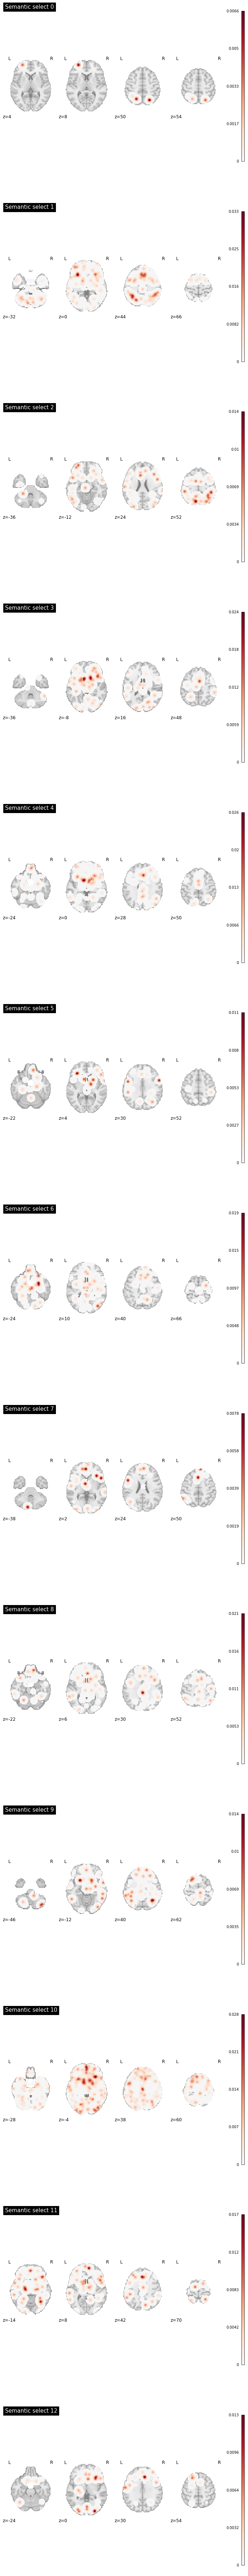

In [37]:
## Check
map_name = "stat"
imgs = {}
res_len = len(corrected_results)
fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, corr_result) in enumerate(corrected_results.items()):
    imgs[k] = corr_result.get_map(
        map_name
    )

    plot_stat_map(
        imgs[k],
        cut_coords=4,
        display_mode="z",
        title="Semantic select " + str(index),
        # threshold=0.00001,  #'auto' # cluster-level p < .01, one-tailed
        cmap="RdBu_r",
        # vmax=4,
        axes=axes[index],
        figure=fig,
    )


## Save images to nifti

In [38]:
for index, (file_name, img) in enumerate(imgs.items()):
    nib.save(img, os.path.join(os.path.abspath(_nii_folder), file_name + '.nii'))
    nib.save(corrected_results[file_name].get_map('z'),
             os.path.join(os.path.abspath(_nii_folder_z), file_name + '-z.nii'))

## Statistics

In [39]:
from IPython.display import display
from nimare.diagnostics import FocusCounter

counter = FocusCounter(
    target_image="stat",
    voxel_thresh=None,
)
for index, (file_name, corr_res) in enumerate(corrected_results.items()):
    print(file_name)
    count_table, _ = counter.transform(corr_res)
    print(count_table.shape)
    display(count_table)

select00_test


100%|██████████| 1/1 [00:00<00:00, 71.36it/s]

(2, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(23, -65, 47)","(-28, -58, 44)","(-26, 52, 7)"
Test test test-,1,2,1


select01_wm


100%|██████████| 12/12 [00:00<00:00, 16.49it/s]

(13, 1)


,1
Cluster ID,
Center of Mass,"(1, -20, 9)"
Beneventi et al-An fMRI study of working memor..,24
Carrion et al-Frontal Hypoactivation on Func..,34
Di et al-Anterior cingulate cortex diff..,26
Drobyshevsky et al-A Rapid fMRI Task Battery for ..,13
Duggirala et al-Stimulus-dependent modulation ..,62
Lee et al-Abnormal neural activity in pa..,56
Padilla et al-Long-term brain effects of N-b..,23
Pochon et al-The neural system that bridges..,40


select02_wm_decision-making


100%|██████████| 3/3 [00:00<00:00, 19.21it/s]

(4, 1)


,1
Cluster ID,
Center of Mass,"(-2, -20, 16)"
Cruz et al-Alterations in the functional ..,26
Nobre et al-Orienting Attention to Locatio..,38
Reilhac et al-Role of the superior parietal ..,34


select03_reward_anticipation_rw-norw


100%|██████████| 8/8 [00:00<00:00, 29.17it/s]

(9, 1)


,1
Cluster ID,
Center of Mass,"(0, -19, 10)"
Cohen et al-Individual differences in extr..,14
John O Doherty et al-Neural Responses during Antici..,5
Kirscg et al-Anticipation of reward in a no..,40
Knutson et al-A region of mesial prefrontal ..,10
Knutson et al-Anticipation of Increasing Mon..,10
Knutson et al-Dissociation of reward anticip..,13
Koeneke et al-Individual preferences modulat..,5
Spreckelmeyer et al-Anticipation of monetary and s..,17


select04_reward_anticipation_high_low_rew


100%|██████████| 8/8 [00:00<00:00, 26.82it/s]

(9, 1)


,1
Cluster ID,
Center of Mass,"(2, -17, 6)"
Abler et al-From uncertainty to reward - B..,22
Croxson et al-Effort-Based Cost Benefit Valu..,9
Jarcho et al-Developmental effects of decis..,12
Knutson et al-Anticipation of Increasing Mon..,12
Knutson et al-Distributed Neural Representat..,26
Smith et al-Neural substrates of reward ma..,10
Spreckelmeyer et al-Anticipation of monetary and s..,47
Tobler et al-Reward Value Coding Distinct F..,14


select05_reward_anticipation_exp_recv_rew


100%|██████████| 3/3 [00:00<00:00, 46.83it/s]

(4, 1)


,1
Cluster ID,
Center of Mass,"(1, -7, 10)"
John O Doherty et al-Neural Responses during Antici..,8
Rademacher et al-Dissociation of neural network..,25
Tobler et al-Reward Value Coding Distinct F..,5


select06_reward_outcome_rw-norw


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]

(11, 1)


,1
Cluster ID,
Center of Mass,"(4, -19, 9)"
Cohen et al-Individual differences in extr..,23
Elliott et al-Differential Response Patterns..,6
Elliott et al-Instrumental responding for re..,12
John O Doherty et al-Neural Responses during Antici..,4
Knutson et al-A region of mesial prefrontal ..,4
Knutson et al-Dissociation of reward anticip..,4
Koeneke et al-Individual preferences modulat..,28
Schienle et al-Binge-Eating Disorder Reward ..,12


select07_reward_outcome_risk-safe


100%|██████████| 3/3 [00:00<00:00, 44.74it/s]

(4, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(59, -31, -3)","(-7, 18, 12)","(-20, -74, 5)"
Abler et al-From uncertainty to reward - B..,0,3,2
Lawrence et al-Distinct Roles of Prefrontal C..,0,18,1
Xue et al-Functional Dissociations of Ri..,1,7,8


select08_reward_outcome_high-low


100%|██████████| 9/9 [00:00<00:00, 32.46it/s]

(10, 1)


,1
Cluster ID,
Center of Mass,"(2, -18, 12)"
Abler et al-From uncertainty to reward - B..,16
Cloutier et al-Are Attractive People Rewardin..,19
Delgado et al-Dorsal striatum responses to r..,11
Elliott et al-Dissociable Neural Responses i..,1
Jarcho et al-Developmental effects of decis..,24
Knutson et al-Dissociation of reward anticip..,6
Nieuwenhuis et al-Activity in human reward-sensi..,10
Signe Bray and John O'Doherty-Neural Coding of Reward-Predic..,5


select09_reward_outcome_win-lose


100%|██████████| 6/6 [00:00<00:00, 25.73it/s]

(7, 1)


,1
Cluster ID,
Center of Mass,"(1, -17, 13)"
Christakou et al-Right Ventromedial and Dorsola..,8
Fujiwara et al-Segregated and Integrated Codi..,18
Greck et al-Is our self based on reward - ..,20
Lawrence et al-Distinct Roles of Prefrontal C..,13
Vassena et al-Dissociating contributions of ..,36
Xue et al-Functional Dissociations of Ri..,25


select10_reward_decision-making_outcome


100%|██████████| 22/22 [00:01<00:00, 15.54it/s]

(23, 1)


,1
Cluster ID,
Center of Mass,"(0, -21, 10)"
Abler et al-From uncertainty to reward - B..,26
Akitsuki et al-Context-dependent cortical act..,35
Christakou et al-Right Ventromedial and Dorsola..,13
Cohen et al-Individual differences in extr..,23
Cox et al-Learning to Like A Role for H..,21
Delgado et al-Tracking the Hemodynamic Respo..,31
Elliott et al-Dissociable Neural Responses i..,18
Elliott et al-Instrumental responding for re..,19


select11_reward_decision-making_anticipation


100%|██████████| 7/7 [00:00<00:00, 27.43it/s]

(8, 1)


,1
Cluster ID,
Center of Mass,"(0, -15, 11)"
Abler et al-From uncertainty to reward - B..,38
Cohen et al-Individual differences in extr..,14
Jarcho et al-Developmental effects of decis..,22
Koeneke et al-Individual preferences modulat..,5
Rosell-Negre et al-Monetary reward magnitude effe..,11
Smith et al-Neural substrates of reward ma..,14
Tobler et al-Reward Value Coding Distinct F..,19


select12_reward_decision-making_decision


100%|██████████| 4/4 [00:00<00:00, 34.75it/s]

(5, 3)


,1,2,3
Cluster ID,,,
Center of Mass,"(-2, -6, 9)","(27, -61, 37)","(-23, -65, 43)"
Lawrence et al-Distinct Roles of Prefrontal C..,5,0,0
Rogers et al-Distinct Portions of Anterior ..,24,0,0
Schonberg et al-Decreasing ventromedial prefro..,17,0,0
Vassena et al-Dissociating contributions of ..,11,1,1


## Conjunctions

In [40]:
tmp_imgs = copy.deepcopy(imgs)

In [41]:
dict_keys = list(tmp_imgs.keys())
dict_keys

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

In [42]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula, img1=copy.deepcopy(tmp_imgs[dict_keys[3]]), img2=copy.deepcopy(tmp_imgs[dict_keys[11]]))
num_vox = np.sum(img_conj.get_fdata() > 0)
num_vox

CPU times: total: 375 ms
Wall time: 363 ms


130303

TEST the conjunctions 3 vs 2x2
//1,4,12
//3 4 11

In [43]:
%%time
formula = "np.where(img1 * img2 * img3 > 0, np.minimum(img1, img2,img3), 0)"
img_conj1 = math_img(formula,
                     img1=copy.deepcopy(tmp_imgs[dict_keys[3]]),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[4]]),
                     img3=copy.deepcopy(tmp_imgs[dict_keys[9]]))
num_vox = np.sum(img_conj1.get_fdata() > 0)
num_vox

CPU times: total: 484 ms
Wall time: 484 ms


93445

In [44]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj2 = math_img(formula,
                     img1=copy.deepcopy(img_conj1),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[10]]))
num_vox = np.sum(img_conj2.get_fdata() > 0)
num_vox

CPU times: total: 312 ms
Wall time: 316 ms


93430

In [45]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj3 = math_img(formula,
                     img1=copy.deepcopy(img_conj2),
                     img2=copy.deepcopy(tmp_imgs[dict_keys[8]]))
num_vox = np.sum(img_conj3.get_fdata() > 0)
num_vox

CPU times: total: 344 ms
Wall time: 338 ms


86317

### Get non null pixels

In [46]:
t1_data = img_conj.get_fdata()
t1_data.shape

(91, 109, 91)

In [47]:
pts_lst = []
for i in range(t1_data.shape[0]):
    for j in range(t1_data.shape[1]):
        for k in range(t1_data.shape[2]):
            if t1_data[i, j, k] != 0: pts_lst.append([i, j, k])

In [48]:
len(pts_lst)

130303

## Save img to nifti

In [49]:
# img_to_save = img_conj1
# img_name = 'img_combo1_4'
# nib.save(img_to_save, os.path.join(os.path.abspath(_nii_combos_folder), img_name + '.nii'))

## recursive conjunctions

In [50]:
# Create a base nifti
base_img = math_img("np.where(img1  > 0, 10000,10000)", img1=copy.deepcopy(tmp_imgs[dict_keys[0]]))

In [51]:
### !! Check for empty maps
rec_list = ['base_img',
            'select01_wm',
            'select02_wm_decision-making',
            'select03_reward_anticipation_rw-norw',
            'select04_reward_anticipation_high_low_rew',
            'select05_reward_anticipation_exp_recv_rew',
            'select06_reward_outcome_rw-norw',
            'select07_reward_outcome_risk-safe', # Empty
            'select08_reward_outcome_high-low',
            'select09_reward_outcome_win-lose',
            'select10_reward_decision-making_outcome',
            'select11_reward_decision-making_anticipation',
            'select12_reward_decision-making_decision']

In [52]:
path_set = set()
tmp_imgs['base_img'] = base_img

In [53]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"

def recursive_conjunction(index, img_conj, path):
    if index == len(rec_list): return
    img_conj = math_img(formula, img1=copy.deepcopy(img_conj), img2=copy.deepcopy(tmp_imgs[rec_list[index]]))
    if np.sum(img_conj.get_fdata() > 0):
        path_set.add(tuple(path))
    else:
        return
    print(tuple(path))
    for i in range(index + 1, len(rec_list) + 1):
        recursive_conjunction(i, copy.deepcopy(img_conj), path + [i])
    return


In [54]:
recursive_conjunction(0, base_img, [])

()
(1,)
(1, 2)
(1, 2, 3)
(1, 2, 3, 4)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5, 6)
(1, 2, 3, 4, 5, 6, 7)
(1, 2, 3, 4, 5, 6, 7, 8)
(1, 2, 3, 4, 5, 6, 7, 8, 9)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 10)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 11)
(1, 2, 3, 4, 5, 6, 7, 8, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 12)
(1, 2, 3, 4, 5, 6, 7, 9)
(1, 2, 3, 4, 5, 6, 7, 9, 10)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 10, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 11)
(1, 2, 3, 4, 5, 6, 7, 9, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 9, 12)
(1, 2, 3, 4, 5, 6, 7, 10)
(1, 2, 3, 4, 5, 6, 7, 10, 11)
(1, 2, 3, 4, 5, 6, 7, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 10, 12)
(1, 2, 3, 4, 5, 6

KeyboardInterrupt: 

In [ ]:
print(path_set)

## Save models to pickle

In [ ]:
import pickle
import csv

In [ ]:
path_set_file_name = r'path_set.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'wb'))


## Load models from pickle

In [ ]:
retrieved_path_set = pickle.load(open(os.path.join(os.path.abspath(_res_folder), path_set_file_name), 'rb'))
retrieved_path_set

In [ ]:
lst_models = list(retrieved_path_set)
lst_models.sort(key=lambda x: len(x) if type(x) is tuple else 1)
display(lst_models)

In [ ]:
lst_file_name = r'path_list.dump'
pickle.dump(path_set, open(os.path.join(os.path.abspath(_res_folder), lst_file_name), 'wb'))
# writing the data into the file
lst_file_name_csv = r'path_list.csv'
with open(os.path.join(os.path.abspath(_res_folder), lst_file_name_csv), 'w', newline='') as f:
    write = csv.writer(f)
    write.writerows(lst_models)

## Convert to BA

In [ ]:
lst_models = [list(x) for x in lst_models]

### Eliminate the singular models

In [ ]:
lst_models = [x for x in lst_models if len(x)]# and len(x) >1]
lst_models

### Create the Conjugate images

In [ ]:
import tqdm

In [ ]:
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conjugates = []
for model in tqdm.tqdm(lst_models):
    if not model: continue
    img_conj = copy.deepcopy(base_img)
    for i in range(len(model)):
        img_conj = math_img(formula,
                            img1=copy.deepcopy(img_conj),
                            img2=copy.deepcopy(tmp_imgs[dict_keys[model[i]]]))
    # num_vox = np.sum(img_conj.get_fdata() > 0)
    img_conjugates.append(img_conj)

### Obtain non null coordinates

In [ ]:
def get_non_null_nifti_val(nifti):
    pts_lst = []
    for i in range(nifti.get_fdata().shape[0]):
        for j in range(nifti.get_fdata().shape[1]):
            for k in range(nifti.get_fdata().shape[2]):
                if nifti.get_fdata()[i, j, k] != 0: pts_lst.append([i, j, k])
    return pts_lst

In [ ]:
pts_list_conj = []
for img in tqdm.tqdm(img_conjugates):
    pts_list_conj.append(get_non_null_nifti_val(img))

### Convert the Coordinates

In [ ]:
from scipy.interpolate import interp1d
import util.function_conv_mni as util_conv
import importlib

importlib.reload(util_conv)

In [ ]:
#Interpolation
X = [[1, 91], [1, 109], [1, 91]]
Y = [[-90, 90], [-126, 90], [-72, 108]]
# test value
x_interp = interp1d(X[0], Y[0])
y_interp = interp1d(X[1], Y[1])
z_interp = interp1d(X[2], Y[2])

In [ ]:
pts_list_conj_conv = []
for pts in pts_list_conj:
    pts_list_conj_conv.append([[x_interp(x).item(), y_interp(y).item(), z_interp(z).item()] for x, y, z in pts])

In [ ]:
one_line_lst = []
table_lst = []
for pts in pts_list_conj_conv:
    one_line, table = util_conv.find_structure(pts)
    one_line_lst.append(one_line)
    table_lst.append(table)

In [ ]:
# for i in range(len(one_line_lst[34])):
#     print(one_line_lst[34][i])

### Parse the results


In [ ]:
one_line_lst_parsed = []
for ind, results in enumerate(one_line_lst):
    set_lst = [set() for x in range(7)]
    set_lst[0] = (ind, lst_models[ind])
    for result in results:
        for index, el in enumerate(result.split("//")):
            if index == 0 or el.rstrip().lstrip() == 'undefined': continue
            set_lst[index].add(el)
    one_line_lst_parsed.append(set_lst)

In [ ]:
one_line_lst_parsed

In [ ]:
lst = [44,45,46]
for i in lst:
    print("\nCombo: ", lst_models[i])
    for index,el in enumerate(one_line_lst[i]):
        el_striped = el.split("//")
        if el_striped[5].rstrip().lstrip() != 'undefined':
            print(pts_list_conj_conv[i][index],el)



In [ ]:
one_line_lst[46]

In [ ]:
one_line_lst[46]